In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
myLoc = MultipleLocator(7)
myFmt = DateFormatter('%d.%m')

df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
df.index = pd.to_datetime(df['dateRep'])
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
dateRep,,,,,,,,,,
2020-04-18,2020-04-18,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0
2020-04-17,2020-04-17,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0
2020-04-16,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
2020-04-15,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
2020-04-14,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-25,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
2020-03-24,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
2020-03-23,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0


In [2]:
np.sort(pd.unique(df['countriesAndTerritories']))

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Es

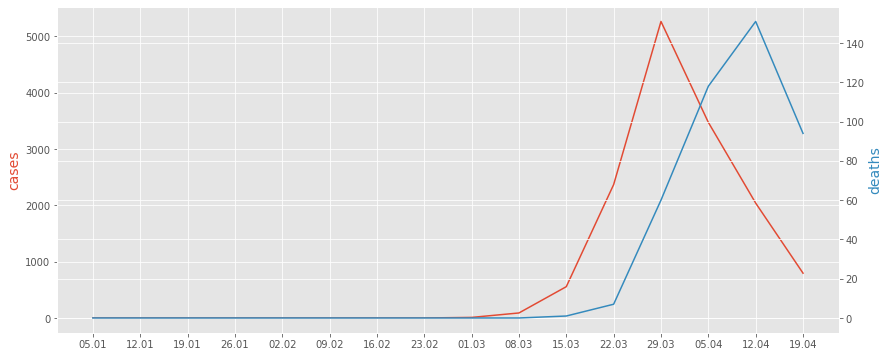

In [23]:
# Vaihda maa ja aja tämän solun koodi uudelleen
maa = 'Austria'

df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']].resample('W').sum()

fig, ax = plt.subplots(figsize = (14, 6))

ax.set_ylabel('cases', color='C0', fontsize=14)
ax.plot(df_maa['cases'], color='C0')

ax_T = ax.twinx()

ax_T.set_ylabel('deaths', color='C1', fontsize=14)
ax_T.plot(df_maa['deaths'], color='C1')

ax.xaxis.set_major_locator(myLoc)
ax.xaxis.set_major_formatter(myFmt)